In [105]:
import numpy as np
import torch.nn as nn
import torch
import idx2numpy 
from torchvision.transforms.functional import gaussian_blur
from torch import optim

from matplotlib import pyplot as plt
from deepshape.surfaces import * 

In [217]:
# Load Data
imgfile = "../data/t10k-images.idx3-ubyte"
imgdata = torch.tensor( idx2numpy.convert_from_file(imgfile), dtype=torch.float )
labelfile = "../data/t10k-labels.idx1-ubyte"
labels = torch.tensor( idx2numpy.convert_from_file(labelfile))
imgdata = gaussian_blur(imgdata, [3, 3])
imgdata /= imgdata.max()

# Extract example images
img1 = imgdata[6]
img2 = imgdata[0]

In [218]:
im = img1

In [340]:
imgdata[:3]

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])

In [342]:
area_scaling_factor(imgdata[:3])

RuntimeError: mat1 and mat2 shapes cannot be multiplied (84x28 and 3x3)

In [332]:
def eye_offset(N, k=0):
    return torch.diag(torch.ones(N-abs(k)), diagonal=k)


def finite_difference_matrix(N):
    D = eye_offset(N, k=1) - eye_offset(N, k=-1)
    D[0, :2] = torch.tensor((-2, 2))
    D[-1, -2:] = torch.tensor((-2, 2))
    return D


def trapezian_weight_vector(N):
    w = torch.ones(N, 1)
    w[[0, -1]] = 0.5
    return w


def image_area(im):
    N = im.shape[0]
    h = 1 / (N - 1)
    D = finite_difference_matrix(N)
    w = trapezian_weight_vector(N)

    fxh = (im @ D.T)
    fyh = (D @ im)
    
    return float(0.5 * h * w.T @ (np.sqrt(4 * h**2 + fxh**2 + fyh**2)) @ w)


def area_scaling_factor(im):
    N = im.shape[0]
    h = 1 / (N - 1)
    D = finite_difference_matrix(N)
    fxh = (im @ D.T)
    fyh = (D @ im)
    return np.sqrt(4 * h**2 + fxh**2 + fyh**2) / (2*h)

In [334]:
def f(x, y):
    return x + y

N = 11
h = 1 / (N - 1)
x = np.linspace(0, 1, N)
XX = np.meshgrid(x, x)
U = f(*XX)
D = finite_difference_matrix(N)

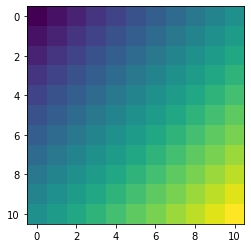

In [338]:
plt.figure()
plt.imshow(U)
plt.show()

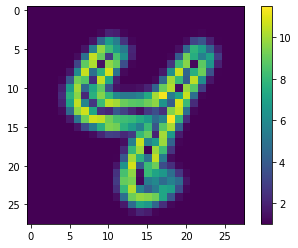

In [336]:
plt.imshow(area_scaling_factor(im))
plt.colorbar()
plt.show()

In [297]:
torch.tensor(U, dtype=torch.float32)

tensor([[0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
         0.9000, 1.0000],
        [0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000, 0.9000,
         1.0000, 1.1000],
        [0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000, 0.9000, 1.0000,
         1.1000, 1.2000],
        [0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000, 0.9000, 1.0000, 1.1000,
         1.2000, 1.3000],
        [0.4000, 0.5000, 0.6000, 0.7000, 0.8000, 0.9000, 1.0000, 1.1000, 1.2000,
         1.3000, 1.4000],
        [0.5000, 0.6000, 0.7000, 0.8000, 0.9000, 1.0000, 1.1000, 1.2000, 1.3000,
         1.4000, 1.5000],
        [0.6000, 0.7000, 0.8000, 0.9000, 1.0000, 1.1000, 1.2000, 1.3000, 1.4000,
         1.5000, 1.6000],
        [0.7000, 0.8000, 0.9000, 1.0000, 1.1000, 1.2000, 1.3000, 1.4000, 1.5000,
         1.6000, 1.7000],
        [0.8000, 0.9000, 1.0000, 1.1000, 1.2000, 1.3000, 1.4000, 1.5000, 1.6000,
         1.7000, 1.8000],
        [0.9000, 1.0000, 1.1000, 1.20

In [301]:
np.sqrt(area_scaling_factor(torch.tensor(U, dtype=torch.float32)))

tensor([[1.3161, 1.3161, 1.3161, 1.3161, 1.3161, 1.3161, 1.3161, 1.3161, 1.3161,
         1.3161, 1.3161],
        [1.3161, 1.3161, 1.3161, 1.3161, 1.3161, 1.3161, 1.3161, 1.3161, 1.3161,
         1.3161, 1.3161],
        [1.3161, 1.3161, 1.3161, 1.3161, 1.3161, 1.3161, 1.3161, 1.3161, 1.3161,
         1.3161, 1.3161],
        [1.3161, 1.3161, 1.3161, 1.3161, 1.3161, 1.3161, 1.3161, 1.3161, 1.3161,
         1.3161, 1.3161],
        [1.3161, 1.3161, 1.3161, 1.3161, 1.3161, 1.3161, 1.3161, 1.3161, 1.3161,
         1.3161, 1.3161],
        [1.3161, 1.3161, 1.3161, 1.3161, 1.3161, 1.3161, 1.3161, 1.3161, 1.3161,
         1.3161, 1.3161],
        [1.3161, 1.3161, 1.3161, 1.3161, 1.3161, 1.3161, 1.3161, 1.3161, 1.3161,
         1.3161, 1.3161],
        [1.3161, 1.3161, 1.3161, 1.3161, 1.3161, 1.3161, 1.3161, 1.3161, 1.3161,
         1.3161, 1.3161],
        [1.3161, 1.3161, 1.3161, 1.3161, 1.3161, 1.3161, 1.3161, 1.3161, 1.3161,
         1.3161, 1.3161],
        [1.3161, 1.3161, 1.3161, 1.31

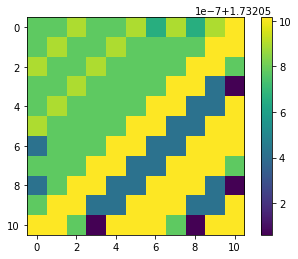

In [298]:
plt.imshow(area_scaling_factor(torch.tensor(U, dtype=torch.float32)))
plt.colorbar()
plt.show()

In [287]:
A[0, :2] = torch.tensor([-2, 2])
A[0, :2] = np.array([-2, 2])

A

TypeError: can't assign a numpy.ndarray to a torch.FloatTensor

In [280]:
eye_offset(6, 1) - eye_offset(6, -1)

tensor([[ 0.,  1.,  0.,  0.,  0.,  0.],
        [-1.,  0.,  1.,  0.,  0.,  0.],
        [ 0., -1.,  0.,  1.,  0.,  0.],
        [ 0.,  0., -1.,  0.,  1.,  0.],
        [ 0.,  0.,  0., -1.,  0.,  1.],
        [ 0.,  0.,  0.,  0., -1.,  0.]])

In [196]:
w = np.ones(5)
w[[0, -1]] = 0.5
w

array([0.5, 1. , 1. , 1. , 0.5])

In [158]:
def f(x, y):
    return 3*x**2 + 3*y**2

In [166]:
N = 101
h = 1 / (N - 1)
x = np.linspace(0, 1, N)
XX = np.meshgrid(x, x)
U = f(*XX)
D = finite_difference_matrix(N)

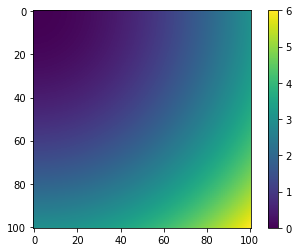

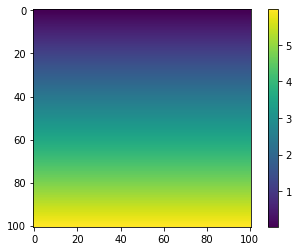

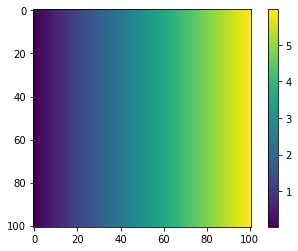

In [164]:
plt.imshow(U)
plt.colorbar()
plt.show()
plt.imshow((D @ U) / (2*h))
plt.colorbar()
plt.show()
plt.imshow((U @ D.T) / (2*h))
plt.colorbar()
plt.show()

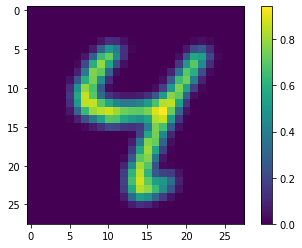

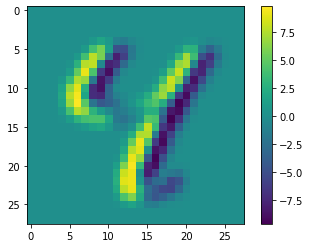

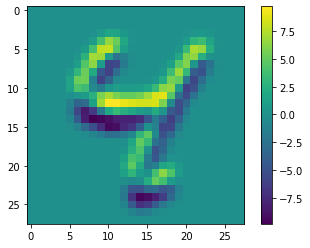

In [173]:
N = im.shape[0]
h = 1 / (N - 1)
x = np.linspace(0, 1, N)
XX = np.meshgrid(x, x)
U = f(*XX)
D = finite_difference_matrix(N)

fx = (im @ D.T) / (2*h)
fy = (D @ im) / (2*h)

plt.imshow(im)
plt.colorbar()
plt.show()
plt.imshow(fx)
plt.colorbar()
plt.show()
plt.imshow(fy)
plt.colorbar()
plt.show()

In [182]:
np.sqrt(4 * h**2 + fxh**2 + fyh**2).dot(w)

NameError: name 'fxh' is not defined

In [174]:
N = im.shape[0]
h = 1 / (N - 1)
x = np.linspace(0, 1, N)
XX = np.meshgrid(x, x)
U = f(*XX)
D = finite_difference_matrix(N)

fx = (im @ D.T) / (2*h)
fy = (D @ im) / (2*h)

In [175]:
w.dot(A).dot(w) * h**2

3.305175565395953

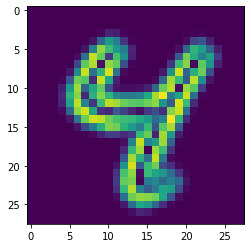

In [176]:
plt.imshow(np.sqrt(1. + fx**2 + fy**2))